# Week 2 - Assignment

In [1]:
%matplotlib notebook

In [2]:
import matplotlib as mpl
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
from matplotlib.artist import Artist

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 4000

In [3]:
def data_prep():
    # Read the file
    df = pd.read_csv('Course2_Resources/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

    # Top values (comparing data from all stations)
    # From 165.085 to around 4.000 rows
    df = df.groupby('Date').agg({'Data_Value' : (np.max, np.min)})
    df = df['Data_Value']
    # Setting a datetime index
    df.index = pd.to_datetime(df.index)

    # Pulling the data for the period 2005-2014
    dfUpTo2014 = df[:'2014']

    # Pulling month and day info for later comparison between years
    dfUpTo2014['Year'] = dfUpTo2014.index.year
    dfUpTo2014['Month'] = dfUpTo2014.index.month
    dfUpTo2014['Day'] = dfUpTo2014.index.day

    # Comparison for same month and day between years
    # From around 4.000 rows to 360 approx.
    byMonth = dfUpTo2014.groupby(['Month', 'Day']).agg({'amax' : np.max, 'amin' : np.min})
    
    return byMonth

In [4]:
df = data_prep()

day_month = []

for ind, row in df.iterrows():
    day_month.append(str(ind[0]) + '/' + str(ind[1]))

tmax = df['amax'].values
tmin = df['amin'].values
dates = day_month

<IPython.core.display.Javascript object>


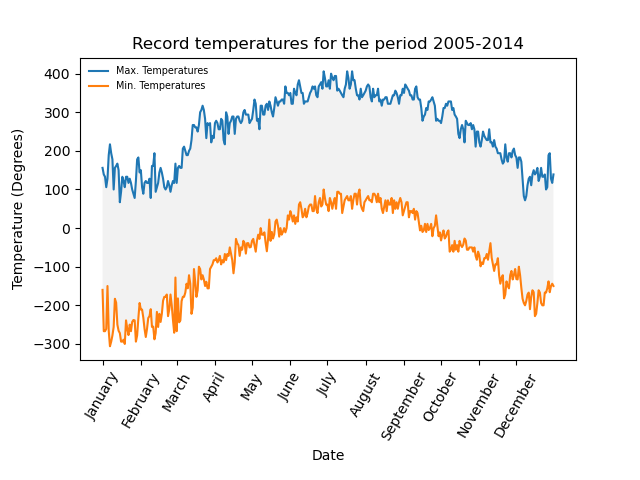

In [5]:
plt.figure()

# Plot the max and min record temperatures
plt.plot(dates, tmax, '-', label = 'Max. Temperatures')
plt.plot(dates, tmin, '-', label = 'Min. Temperatures')

# Setting values of the xaxis
# We choose the positions for major ticks to show up and what values those ticks should
# show
ticks = [0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
plt.xticks(ticks, labels)

# Labels for the axis
plt.xlabel('Date')
plt.ylabel('Temperature (Degrees)')
plt.title('Record temperatures for the period 2005-2014')
plt.legend(loc = 2, frameon = False, fontsize = 'x-small')

# Fill space between both lines
plt.gca().fill_between(range(len(tmax)),
                      tmin, tmax, facecolor = 'grey', alpha = 0.1)

# Pulling the xaxis ticks for later editing
x = plt.gca().xaxis

# Rotating the xaxis ticks
for item in x.get_ticklabels():
    item.set_rotation(60)
    
plt.subplots_adjust(bottom = 0.25)

plt.show()

In [28]:
# Read the file
df = pd.read_csv('Course2_Resources/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df2 = data_prep()

# Top values (comparing data from all stations)
# From 165.085 to around 4.000 rows
df = df.groupby('Date').agg({'Data_Value' : (np.max, np.min)})
df = df['Data_Value']
# Setting a datetime index
df.index = pd.to_datetime(df.index)

# Pulling the data for the year 2015
df2015 = df['2015']

# Pulling month and day info for later comparison between years
df2015['Month'] = df2015.index.month
df2015['Day'] = df2015.index.day
df2015.set_index(['Month', 'Day'], inplace = True)
df2015.columns = ['Max 2015', 'Min 2015']
df2.columns = ['Max 2005-2014', 'Min 2005-2014']
comparison = pd.merge(df2, df2015, how = 'left', left_index = True, right_index = True)
comparison['2015 broke max record'] = comparison['Max 2015'] > comparison['Max 2005-2014']
comparison['2015 broke min record'] = comparison['Min 2015'] < comparison['Min 2005-2014']
#comparison[comparison['2015 broke max record'] == True]
comparison.shape

(366, 6)

<IPython.core.display.Javascript object>


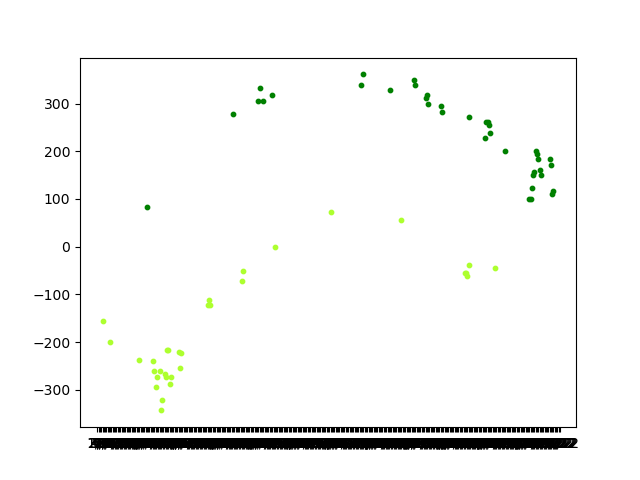

In [25]:
# First, I pull the values of records in 2015

# I start with the max records
datesMax2015 = []
tmax2015 = []

for ind, row in comparison.iterrows():
    datesMax2015.append(str(ind[1]) + '/' + str(ind[0]))
    
    if row['2015 broke max record'] == True:
        tmax2015.append(row['Max 2015'])
    else:
        tmax2015.append(np.nan)
        
# Then the min records
datesMin2015 = []
tmin2015 = []

for ind, row in comparison.iterrows():
    datesMin2015.append(str(ind[1]) + '/' + str(ind[0]))
    
    if row['2015 broke min record'] == True:
        tmin2015.append(row['Min 2015'])
    else:
        tmin2015.append(np.nan)
        
plt.figure()
# plot the point with size 10 and chosen colors
plt.scatter(datesMax2015, tmax2015, s = 10, c = 'green')
plt.scatter(datesMin2015, tmin2015, s = 10, c = 'greenyellow')

<IPython.core.display.Javascript object>


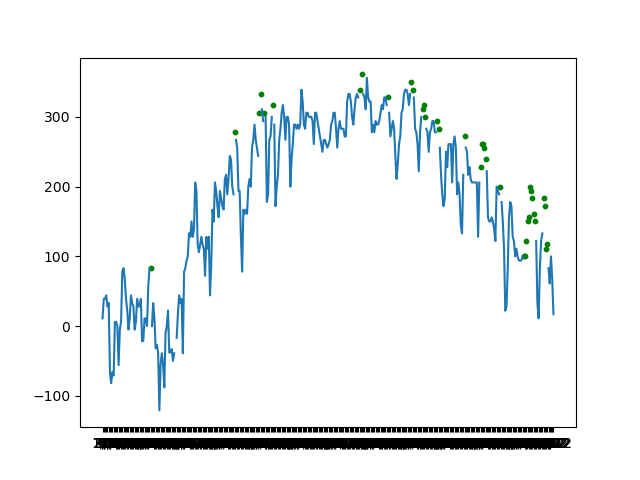

In [27]:
tmax2014 = []

for ind, row in comparison.iterrows():    
    if row['2015 broke max record'] == False:
        tmax2014.append(row['Max 2015'])
    else:
        tmax2014.append(np.nan)

plt.figure()

plt.scatter(datesMax2015, tmax2015, s = 10, c = 'green')
plt.plot(datesMax2015, tmax2014, '-')